In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
# define data
charge_eu = pd.read_csv("D:\creditCardFraudDetection_data/20170314_charge_eu.csv", encoding='utf-8-sig')
charge_na = pd.read_csv("D:\creditCardFraudDetection_data/20170314_charge_na.csv", encoding='utf-8-sig')
purchase_eu = pd.read_csv("D:\creditCardFraudDetection_data/20170411_purchase_eu.csv", encoding='utf-8-sig')
purchase_na = pd.read_csv("D:\creditCardFraudDetection_data/20170411_purchase_eu.csv", encoding='utf-8-sig')

In [74]:
def createAbuserDataSet(data_set):
    data_set = data_set[data_set.charge_status >= 60].drop_duplicates(['user_no'], keep='last')
        
    data_set = pd.DataFrame(data_set, columns=['user_no'])
    data_set['Class'] = 1
    return data_set
def createAllDataSet(data_set):
    data_set = pd.DataFrame(data_set, columns=['user_no']).drop_duplicates(['user_no'], keep='last')
    return data_set

eu 일반 유저의 수:  228078
na 일반 유저의 수:  130860
eu 환불 유저의 수:  726
na 환불 유저의 수:  921
전체 유저의 수:  360585
일반 유저의 비율:  0.9954324223137402
환불 유저의 비율:  0.004567577686259827


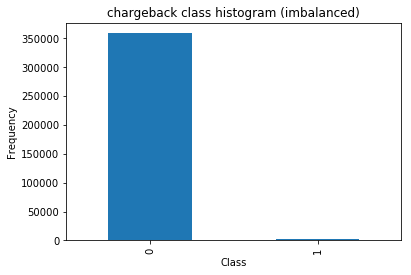

In [92]:
# 데이터 통합 및 일반 유저와 환불 유저의 비율
charge_eu_abuser = createAbuserDataSet(charge_eu)
charge_na_abuser = createAbuserDataSet(charge_na)

# 전체 유저에서 환불 유저를 뺀 것이 일반 유저
charge_eu_normal = createAllDataSet(charge_eu).drop(charge_eu_abuser.index)
charge_eu_normal['Class'] = 0
charge_na_normal = createAllDataSet(charge_na).drop(charge_na_abuser.index)
charge_na_normal['Class'] = 0
print("eu 일반 유저의 수: ", len(charge_eu_normal))
print("na 일반 유저의 수: ", len(charge_na_normal))
print("eu 환불 유저의 수: ", len(charge_eu_abuser))
print("na 환불 유저의 수: ", len(charge_na_abuser))

# 데이터 통합
charge_all = pd.concat([charge_eu_abuser, charge_eu_normal, charge_na_abuser, charge_na_normal])
print("전체 유저의 수: ", len(charge_all))
print("일반 유저의 비율: ", len(charge_all[charge_all.Class == 0]) / len(charge_all))
print("환불 유저의 비율: ", len(charge_all[charge_all.Class == 1]) / len(charge_all))
count_classes = pd.value_counts(charge_all['Class'], sort=True)
count_classes.plot(kind = 'bar')
plt.title("chargeback class histogram (imbalanced)")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [93]:
# feature 생성 과정
charge_all[charge_all['user_no'] == 42002651]

,user_no,Class
1109331,42002651,0
